This notebook will show how the demonstrator has trained over time to be able to compare to the learned reward.
first we will need to load the logs of the demonstrator.

In [1]:
from baselines.common.vec_env import VecFrameStack
from AgentClasses import *
from baselines.common.cmd_util import make_vec_env
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np

from os import listdir
from os.path import isfile, join
import re

#setup the env
model_path = "/home/patrick/models/BreakoutNoFrameskip-v4-groundTruth"
env_id = 'BreakoutNoFrameskip-v4'
env_type = 'atari'

env = make_vec_env(env_id, env_type, 1, 0,
                   wrapper_kwargs={
                       'clip_rewards': False,
                       'episode_life': False,
                   })
env = VecFrameStack(env, 4)
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
agent = PPO2Agent(env, 'atari', True)
#trainedNetwork.to(device)

#run the agent in the env once and save the ground truth reward and observations
def GetDemoFromAgent(agent, network, env):
    trueReward = 0
    learnedReward = 0

    currentReward = 0
    currentObservation = env.reset()
    timeSteps = 0
    done = False

    #run the demo
    while True:
        trueReward += currentReward
        #shapedObservation = torch.from_numpy(currentObservation).float().to(device)
        #reward, abs_reward = network.predict_reward(shapedObservation)
        #learnedReward += reward.tolist()

        action = agent.act(currentObservation,  currentReward, done)
        currentObservation, currentReward, done, info = env.step(action)
        shapedObservations = currentObservation
        timeSteps += 1

        if done:
            trueReward += currentReward
            #reward, abs_reward = network.predict_reward(shapedObservation)
            #learnedReward += reward.tolist()
            break
    print("{}, {}".format(trueReward, learnedReward))
    return trueReward, learnedReward

#a method to find all the models in a given dir that are just numbers
def Find_all_Models(model_dir):

    checkpoints = []
    filesandDirs = listdir(model_dir)
    allFiles = []
    for i in filesandDirs:
        if isfile(join(model_dir, i)):
            allFiles.append(i)

    for file in allFiles:
        if re.match('^[0-9]+$',file.title()):
            checkpoints.append(file.title())
    #checkpoints.sort(key=int)
    return checkpoints

/home/patrick/PycharmProjects/comp300/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/patrick/PycharmProjects/comp300/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/patrick/PycharmProjects/comp300/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/patrick/PycharmP

Logging to /tmp/openai-2019-12-10-15-42-52-614845





Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use keras.layers.flatten instead.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [3]:
models = Find_all_Models(model_path)
Imodels = []
results = []

for model in models:
    Imodels.append(int(model))
    agent.load(model_path + "/" + model)
    reward, _ = GetDemoFromAgent(agent, "", env)
    results.append(reward[0])
    tf.keras.backend.clear_session()

[253.], 0
[315.], 0
[81.], 0
[345.], 0
[346.], 0
[335.], 0
[314.], 0
[356.], 0
[280.], 0
[155.], 0
[244.], 0
[194.], 0
[282.], 0
[369.], 0
[257.], 0
[335.], 0
[318.], 0
[363.], 0
[286.], 0
[341.], 0
[41.], 0
[217.], 0
[317.], 0
[284.], 0
[102.], 0
[346.], 0
[267.], 0
[291.], 0
[42.], 0
[272.], 0
[333.], 0
[300.], 0
[151.], 0
[289.], 0
[320.], 0
[304.], 0
[298.], 0
[326.], 0
[220.], 0
[84.], 0
[67.], 0
[373.], 0
[118.], 0
[66.], 0
[305.], 0
[218.], 0
[380.], 0
[254.], 0
[111.], 0
[231.], 0
[163.], 0
[281.], 0
[334.], 0
[283.], 0
[319.], 0
[307.], 0
[240.], 0
[272.], 0
[123.], 0
[293.], 0
[76.], 0
[318.], 0
[29.], 0
[283.], 0
[279.], 0
[238.], 0
[280.], 0
[349.], 0
[366.], 0
[312.], 0
[298.], 0
[318.], 0
[310.], 0
[163.], 0
[295.], 0
[321.], 0
[306.], 0
[280.], 0
[328.], 0
[344.], 0
[118.], 0
[295.], 0
[282.], 0
[341.], 0
[44.], 0
[314.], 0
[146.], 0
[324.], 0
[340.], 0
[339.], 0
[264.], 0
[317.], 0
[331.], 0
[355.], 0
[355.], 0
[336.], 0
[189.], 0
[57.], 0
[334.], 0
[282.], 0
[336.], 0


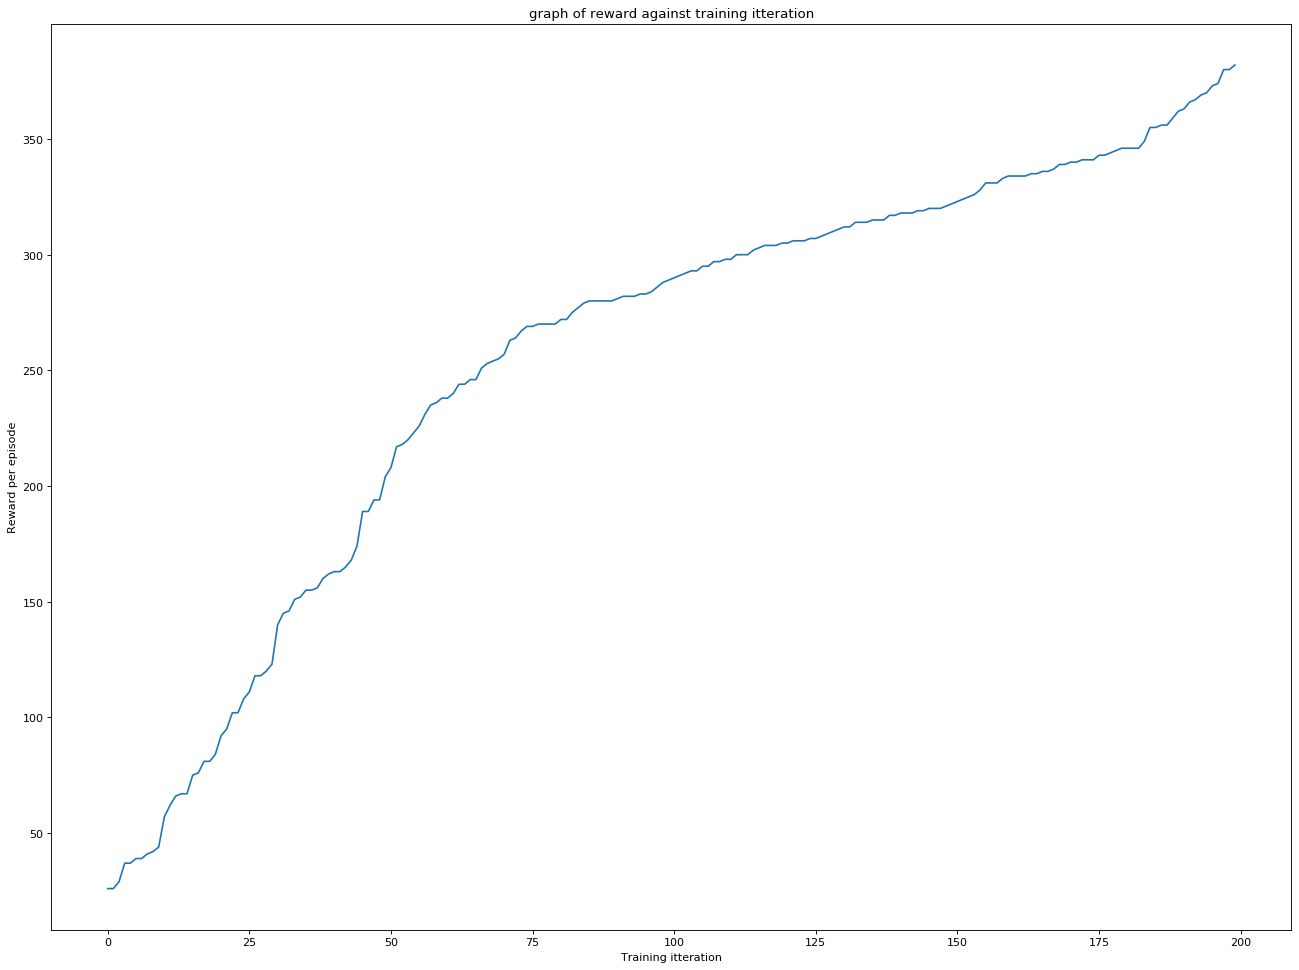

[8400000, 7100000, 6000000, 15300000, 9200000, 16200000, 10400000, 15900000, 3700000, 9100000, 11600000, 15400000, 16600000, 18700000, 8300000, 17800000, 200000, 1500000, 18300000, 18900000, 19900000, 4300000, 17500000, 17700000, 13200000, 17900000, 100000, 16400000, 3000000, 10100000, 600000, 15000000, 17100000, 8800000, 8500000, 3900000, 500000, 12300000, 19100000, 11500000, 300000, 9500000, 8600000, 12200000, 10500000, 11900000, 15700000, 6700000, 18100000, 14500000, 19800000, 10700000, 19000000, 7700000, 4600000, 900000, 16900000, 7600000, 3400000, 1100000, 12400000, 2300000, 5300000, 1400000, 10000000, 17000000, 5200000, 9800000, 800000, 8700000, 19300000, 4200000, 18600000, 7500000, 18200000, 4500000, 14800000, 1600000, 2100000, 4700000, 2700000, 11800000, 3100000, 14400000, 7300000, 6600000, 13800000, 7900000, 400000, 2000000, 9700000, 11100000, 9300000, 18800000, 1300000, 10200000, 11000000, 7000000, 5000000, 19400000, 16300000, 5900000, 1800000, 13600000, 2800000, 2900000, 190

In [26]:
from matplotlib.pyplot import figure
order = np.argsort(Imodels)
xvalues = np.array(Imodels)[order]
yvalues = list(results)
yvalues.sort(key=int)

figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
plt.plot(yvalues)
plt.ylabel("Reward per episode")
plt.xlabel("Training itteration")
plt.title("graph of reward against training itteration")
plt.show()
print(Imodels)